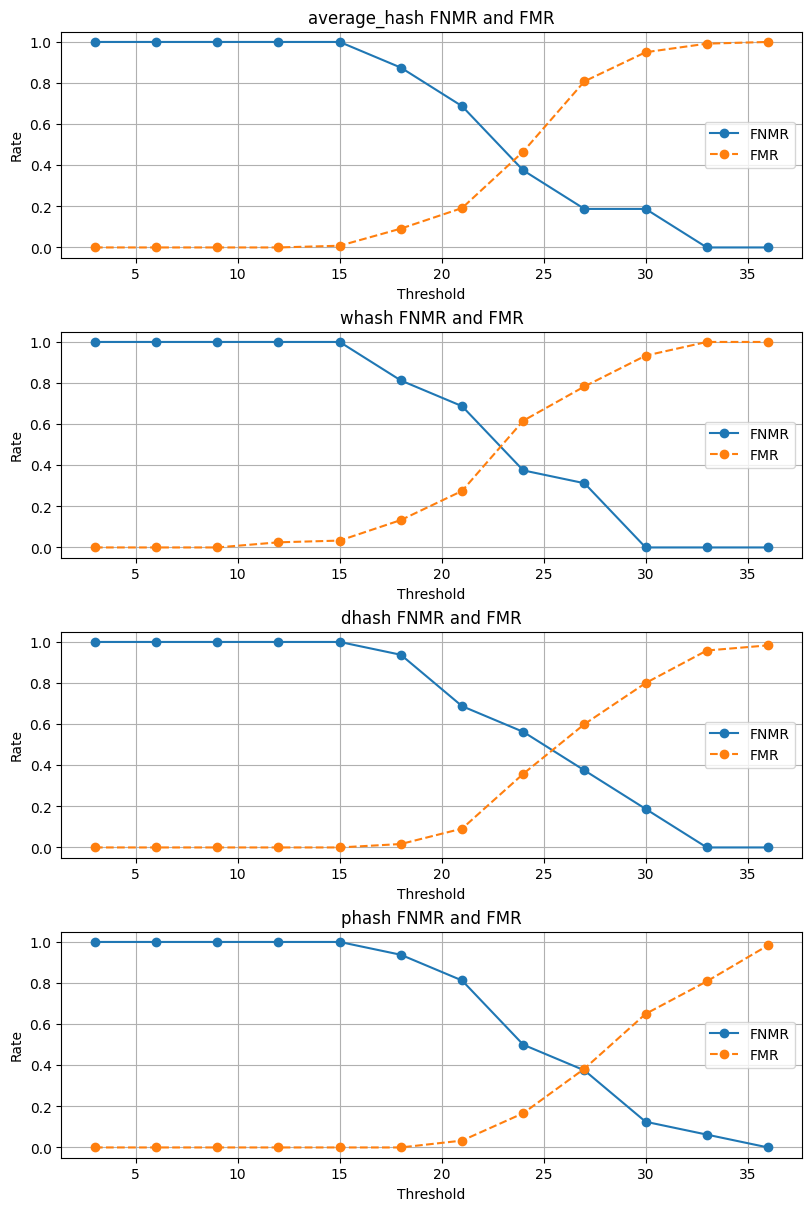

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt

HASH_TYPES = ["average_hash", "whash", "dhash", "phash"]

GENUINE_HD_DIR = 'HammingDistances'
GENUINE_PROB_DIR = 'Probabilities'
IMPOSTOR_HD_DIR = 'HammingDistances'
IMPOSTOR_PROB_DIR = 'Probabilities'

GENUINE_HD_FILE_TEMPLATE = os.path.join(GENUINE_HD_DIR, 'Genuine_{}.csv')
GENUINE_PROB_FILE_TEMPLATE = os.path.join(GENUINE_PROB_DIR, 'Genuine_{}.csv')
IMPOSTOR_HD_FILE_TEMPLATE = os.path.join(IMPOSTOR_HD_DIR, 'Impostor_{}.csv')
IMPOSTOR_PROB_FILE_TEMPLATE = os.path.join(IMPOSTOR_PROB_DIR, 'Impostor_{}.csv')

def calculate_fnmr(genuine_scores, thresholds):
    fnmr_results = {}
    for threshold in thresholds['Threshold']:
        fnmr_count = (genuine_scores > threshold).sum()
        fnmr_results[threshold] = fnmr_count / len(genuine_scores)
    return fnmr_results

def calculate_fmr(impostor_scores, thresholds):
    fmr_results = {}
    for threshold in thresholds['Threshold']:
        fmr_count = (impostor_scores <= threshold).sum()
        fmr_results[threshold] = fmr_count / len(impostor_scores)
    return fmr_results

def load_data(technique):
    genuine_hd_file = GENUINE_HD_FILE_TEMPLATE.format(technique)
    genuine_prob_file = GENUINE_PROB_FILE_TEMPLATE.format(technique)
    impostor_hd_file = IMPOSTOR_HD_FILE_TEMPLATE.format(technique)
    impostor_prob_file = IMPOSTOR_PROB_FILE_TEMPLATE.format(technique)

    for file in [genuine_hd_file, genuine_prob_file, impostor_hd_file, impostor_prob_file]:
        if not os.path.exists(file):
            print(f"File not found: {file}. Skipping technique {technique}.")
            return None, None, None, None

    genuine_matches = pd.read_csv(genuine_hd_file)
    genuine_thresholds = pd.read_csv(genuine_prob_file)
    impostor_matches = pd.read_csv(impostor_hd_file)
    impostor_thresholds = pd.read_csv(impostor_prob_file)
    return genuine_matches, genuine_thresholds, impostor_matches, impostor_thresholds

def plot_results(fnmr_dict, fmr_dict, hash_types):
    fig, axs = plt.subplots(len(hash_types), figsize=(8, 12), constrained_layout=True)

    if len(hash_types) == 1:
        axs = [axs]

    for i, technique in enumerate(hash_types):
        if technique not in fnmr_dict or technique not in fmr_dict:
            continue
        thresholds = list(fnmr_dict[technique].keys())
        fnmr_values = list(fnmr_dict[technique].values())
        fmr_values = list(fmr_dict[technique].values())
        axs[i].plot(thresholds, fnmr_values, marker='o', linestyle='-', label='FNMR')
        axs[i].plot(thresholds, fmr_values, marker='o', linestyle='--', label='FMR')
        axs[i].set_title(f'{technique} FNMR and FMR')
        axs[i].set_xlabel('Threshold')
        axs[i].set_ylabel('Rate')
        axs[i].grid(True)
        axs[i].legend()
    plt.show()

def main():
    fnmr_results_dict = {}
    fmr_results_dict = {}

    for technique in HASH_TYPES:
        genuine_matches, genuine_thresholds, impostor_matches, impostor_thresholds = load_data(technique)

        if any(x is None for x in (genuine_matches, genuine_thresholds, impostor_matches, impostor_thresholds)):
            continue

        fnmr_results = calculate_fnmr(genuine_matches['Hamming Distance'].values, genuine_thresholds)
        fmr_results = calculate_fmr(impostor_matches['Hamming Distance'].values, impostor_thresholds)
        fnmr_results_dict[technique] = fnmr_results
        fmr_results_dict[technique] = fmr_results
    plot_results(fnmr_results_dict, fmr_results_dict, HASH_TYPES)

if __name__ == "__main__":
    main()